
# 5. Объектно ориентированное программирование

## 5.1. Объектная модель Python. Классы, поля и методы

### Теория

**Процедурный** подход в программировании, когда все действия над объектом описаны с помощью функций. Процедурный подход позволяет эффективно решать простые задачи. Однако при усложнении задачи и появлении новых объектов процедурный подход приводит к дублированию и ухудшению читаемости кода.

In [1]:
# vibo: попробуем описать объекты класса с помощью коллекций и функций

# vibo: создание объекта с набором признаков (свойства объекта класса)
def create_car(color, consumption, tank_volume, mileage=0):
    return {
        "color": color, # цвет
        "consumption": consumption, # расход
        "tank_volume": tank_volume, # объем бака
        "reserve": tank_volume, # резерв
        "mileage": mileage, # пробег
        "engine_on": False # двигатель включен
    }

# vibo: определение действий объекта

# vibo: запустить двигатель
def start_engine(car):
    if not car["engine_on"] and car["reserve"] > 0:
        car["engine_on"] = True
        return "Двигатель запущен."
    return "Двигатель уже был запущен."

# vibo: остановить двигатель
def stop_engine(car):
    if car["engine_on"]:
        car["engine_on"] = False
        return "Двигатель остановлен."
    return "Двигатель уже был остановлен."

# vibo: проехать N километров
def drive(car, distance):
    if not car["engine_on"]:
        return "Двигатель не запущен."
    if car["reserve"] / car["consumption"] * 100 < distance:
        return "Малый запас топлива."
    car["mileage"] += distance
    car["reserve"] -= distance / 100 * car["consumption"]
    return f"Проехали {distance} км. Остаток топлива: {car['reserve']} л."

# vibo: дозаправка
def refuel(car):
    car["reserve"] = car["tank_volume"]

# vibo: пробег
def get_mileage(car):
    return f"Пробег {car['mileage']} км."

# vibo: запас топлива
def get_reserve(car):
    return f"Запас топлива {car['reserve']} л."

In [2]:
car_1 = create_car(color="black", consumption=10, tank_volume=55)

In [3]:
print(start_engine(car_1))
print(drive(car_1, 100))
print(drive(car_1, 100))
print(drive(car_1, 100))
print(drive(car_1, 300))
print(get_mileage(car_1))
print(get_reserve(car_1))
print(stop_engine(car_1))
print(drive(car_1, 100))

Двигатель запущен.
Проехали 100 км. Остаток топлива: 45.0 л.
Проехали 100 км. Остаток топлива: 35.0 л.
Проехали 100 км. Остаток топлива: 25.0 л.
Малый запас топлива.
Пробег 300 км.
Запас топлива 25.0 л.
Двигатель остановлен.
Двигатель не запущен.


**Объектно-ориентированное программирование (ООП)**

Python является объектно-ориентированным языком программирования - каждая сущность (переменная, функция и так далее) является объектом определенного класса.

In [4]:
# vibo: например, 1 - принадлежность к классу int
print(type(1))

<class 'int'>


**Синтаксис создания класса**

In [5]:
# vibo: имя класса записывается в стиле CapWords
'''
class <ИмяКласса>:
    <описание класса>
'''

# vibo: создаем класс Car
class Car:
    pass

В классах описываются:
- свойства объектов;
- действия объектов;
- или совершаемые над ними действия.

**Свойства объектов - называются атрибутами. Для создания или изменения значения атрибута используется следующий синтаксис:**

In [ ]:
# vibo: атрибуты — переменные, в значениях которых хранятся свойства объекта
'''
<имя_объекта>.<имя_атрибута> = <значение>
'''

**Действия объектов называются методами. Для создания метода используется следующий синтаксис:**

In [ ]:
# vibo: вызываются методы после указания конкретного объекта
# vibo: в методах первым аргументом всегда идет объект self
'''
def <имя_метода>(self, <аргументы>):
    <тело метода>
'''

In [23]:
# vibo: создадим в классе метод __init__, который будет при создании автомобиля принимать его свойства как аргументы
class Car:

    # vibo: __init__ специальный метод, вызывается при создании объекта
    # vibo: в методе происходит инициализация всех атрибутов класса
    def __init__(self, color, consumption, tank_volume, mileage=0):
        self.color = color
        self.consumption = consumption
        self.tank_volume = tank_volume
        self.reserve = tank_volume
        self.mileage = mileage
        self.engine_on = False

**Создание объекта класса**

In [ ]:
'''
<имя_объекта> = <ИмяКласса>(<аргументы метода __init__>)
'''

# vibo: создаем объект класса
car_1 = Car(color="black", consumption=10, tank_volume=55)

In [7]:
# vibo: опишем с помощью методов какие действия могут совершать объекты класса
class Car:

    def __init__(self, color, consumption, tank_volume, mileage=0):
        self.color = color
        self.consumption = consumption
        self.tank_volume = tank_volume
        self.reserve = tank_volume
        self.mileage = mileage
        self.engine_on = False

    def start_engine(self):
        if not self.engine_on and self.reserve > 0:
            self.engine_on = True
            return "Двигатель запущен."
        return "Двигатель уже был запущен."

    def stop_engine(self):
        if self.engine_on:
            self.engine_on = False
            return "Двигатель остановлен."
        return "Двигатель уже был остановлен."

    def drive(self, distance):
        if not self.engine_on:
            return "Двигатель не запущен."
        if self.reserve / self.consumption * 100 < distance:
            return "Малый запас топлива."
        self.mileage += distance
        self.reserve -= distance / 100 * self.consumption
        return f"Проехали {distance} км. Остаток топлива: {self.reserve} л."

    def refuel(self):
        self.reserve = self.tank_volume

    def get_mileage(self):
        return self.mileage

    def get_reserve(self):
        return self.reserve


# vibo: две пустые строки после класса
car_1 = Car(color="black", consumption=10, tank_volume=55)
print(car_1.start_engine())
print(car_1.drive(100))
print(car_1.drive(100))
print(car_1.drive(100))
print(car_1.drive(300))
print(f"Пробег {car_1.get_mileage()} км.")
print(f"Запас топлива {car_1.get_reserve()} л.")
print(car_1.stop_engine())

Двигатель запущен.
Проехали 100 км. Остаток топлива: 45.0 л.
Проехали 100 км. Остаток топлива: 35.0 л.
Проехали 100 км. Остаток топлива: 25.0 л.
Малый запас топлива.
Пробег 300 км.
Запас топлива 25.0 л.
Двигатель остановлен.


Взаимодействие с объектом класса вне описания класса осуществляется только с помощью методов и прямого доступа к атрибутам не происходит. Этот принцип ООП называется инкапсуляцией.

**Инкапсуляция** заключается в сокрытии внутреннего устройства класса за интерфейсом, состоящим из методов класса. Это необходимо, чтобы не нарушать логику работы методов внутри класса.

In [8]:
# vibo: если в изменить пробег напрямую (не с помощью метода drive()), то автомобиль проедет указанный путь даже с пустым баком и без расхода топлива:
car_1 = Car(color="black", consumption=10, tank_volume=55)
car_1.mileage = 1000
print(f"Пробег {car_1.get_mileage()} км.")
print(f"Запас топлива {car_1.get_reserve()} л.")

Пробег 1000 км.
Запас топлива 55 л.


In [28]:
# vibo: напишем еще один класс автомобилей, отличие в замене топливного бака на заряд аккумуляторной батареи:
class ElectricCar:

    def __init__(self, color, consumption, bat_capacity, mileage=0):
        self.color = color
        self.consumption = consumption
        self.bat_capacity = bat_capacity
        self.reserve = bat_capacity
        self.mileage = mileage
        self.engine_on = False

    def start_engine(self):
        if not self.engine_on and self.reserve > 0:
            self.engine_on = True
            return "Двигатель запущен."
        return "Двигатель уже был запущен."

    def stop_engine(self):
        if self.engine_on:
            self.engine_on = False
            return "Двигатель остановлен."
        return "Двигатель уже был остановлен."

    def drive(self, distance):
        if not self.engine_on:
            return "Двигатель не запущен."
        if self.reserve / self.consumption * 100 < distance:
            return "Малый заряд батареи."
        self.mileage += distance
        self.reserve -= distance / 100 * self.consumption
        return f"Проехали {distance} км. Остаток заряда: {self.reserve} кВт*ч."

    def recharge(self):
        self.reserve = self.bat_capacity

    def get_mileage(self):
        return self.mileage

    def get_reserve(self):
        return self.reserve

**Полиморфные функции** - которые могут работать с объектами разных классов, принцип ООП называется **полиморфизмом.**

In [ ]:
# vibo: функция, определяющая запас хода для двух классов
def range_reserve(car):
    return car.get_reserve() / car.get_consumption() * 100


Программа с классами, полиморфной функцией и пример их использования представлена ниже:

In [9]:
class Car:

    def __init__(self, color, consumption, tank_volume, mileage=0):
        self.color = color
        self.consumption = consumption
        self.tank_volume = tank_volume
        self.reserve = tank_volume
        self.mileage = mileage
        self.engine_on = False

    def start_engine(self):
        if not self.engine_on and self.reserve > 0:
            self.engine_on = True
            return "Двигатель запущен."
        return "Двигатель уже был запущен."

    def stop_engine(self):
        if self.engine_on:
            self.engine_on = False
            return "Двигатель остановлен."
        return "Двигатель уже был остановлен."

    def drive(self, distance):
        if not self.engine_on:
            return "Двигатель не запущен."
        if self.reserve / self.consumption * 100 < distance:
            return "Малый запас топлива."
        self.mileage += distance
        self.reserve -= distance / 100 * self.consumption
        return f"Проехали {distance} км. Остаток топлива: {self.reserve} л."

    def refuel(self):
        self.reserve = self.tank_volume

    def get_mileage(self):
        return self.mileage

    def get_reserve(self):
        return self.reserve

    def get_consumption(self):
        return self.consumption


class ElectricCar:

    def __init__(self, color, consumption, bat_capacity, mileage=0):
        self.color = color
        self.consumption = consumption
        self.bat_capacity = bat_capacity
        self.reserve = bat_capacity
        self.mileage = mileage
        self.engine_on = False

    def start_engine(self):
        if not self.engine_on and self.reserve > 0:
            self.engine_on = True
            return "Двигатель запущен."
        return "Двигатель уже был запущен."

    def stop_engine(self):
        if self.engine_on:
            self.engine_on = False
            return "Двигатель остановлен."
        return "Двигатель уже был остановлен."

    def drive(self, distance):
        if not self.engine_on:
            return "Двигатель не запущен."
        if self.reserve / self.consumption * 100 < distance:
            return "Малый заряд батареи."
        self.mileage += distance
        self.reserve -= distance / 100 * self.consumption
        return f"Проехали {distance} км. Остаток заряда: {self.reserve} кВт*ч."

    def recharge(self):
        self.reserve = self.bat_capacity

    def get_mileage(self):
        return self.mileage

    def get_reserve(self):
        return self.reserve

    def get_consumption(self):
        return self.consumption


def range_reserve(car):
    return car.get_reserve() / car.get_consumption() * 100


car_1 = Car(color="black", consumption=10, tank_volume=55)
car_2 = ElectricCar(color="white", consumption=15, bat_capacity=90)
print(f"Запас хода: {range_reserve(car_1)} км.")
print(f"Запас хода: {range_reserve(car_2)} км.")

Запас хода: 550.0 км.
Запас хода: 600.0 км.



Классы Car и ElectricCar имеют много общих атрибутов и методов, что привело к дублированию кода. В следующей главе мы познакомимся с наследованием.

### Практика /10

In [29]:
# A Полное решение
class Point:

    # vibo: специальный метод __init__
    # vibo: инициализация атрибутов класса
    def __init__(self, x, y):
        self.x = x
        self.y = y


# vibo: создаем объект класса Point
point = Point(3, 5)
# vibo: вызов значений атрибутов класса
print(point.x, point.y)

point = Point(2, -7)
print(point.x, point.y)

3 5
2 -7


In [10]:
# B Полное решение

class Point:

    def __init__(self, x, y):
        self.x = x
        self.y = y

    # vibo: создание метода move
    def move(self, dx, dy):
        self.x += dx
        self.y += dy

    # vibo: создание метода length
    def length(self, name):
        # vibo: self.x - значение аргумента для объекта для которого вызывается метод length
        # vibo: name.x - значение аргумента для объекта, передаваемого в метод length
        return round(((name.x - self.x) ** 2 + (name.y - self.y) ** 2) ** (1 / 2), 2)


# vibo: Пример 1.
point = Point(3, 5)
print(point.x, point.y)
point.move(2, -3)
print(point.x, point.y)

# vibo: Пример 2.
first_point = Point(2, -7)
second_point = Point(7, 9)
# vibo: вызов метода length для объекта first_point в качестве аргумента передаем second_point
print(first_point.length(second_point))
# vibo: и наоборот
print(second_point.length(first_point))

3 5
5 2
16.76
16.76


In [29]:
# C Полное решение
class RedButton:

    # vibo: при создании объекта класса устанавливаем счетчик n на ноль
    def __init__(self):
        self.n = 0

    def click(self):
        print('Тревога!')
        # vibo: при каждом вызове увеличиваем счетчик
        self.n += 1

    def count(self):
        return self.n

# vibo: Пример
first_button = RedButton()
second_button = RedButton()
for time in range(5):
    if time % 2 == 0:
        second_button.click()
    else:
        first_button.click()
print(first_button.count(), second_button.count())

Тревога!
Тревога!
Тревога!
Тревога!
Тревога!
2 3


In [52]:
# D Полное решение
class Programmer:

    def __init__(self, name, position):
        # vibo: передаваемые в класс атрибуты для инициализации объекта
        self.name = name
        self.position = position
        # vibo: сквозные переменные для накопления итогового результата
        self.time = 0
        self.grade = 0
        self.money = 0

    # vibo: метод отмечает новую отработку в количестве часов time
    def work(self, new_time):

        self.time += new_time
        grad_money = {'Junior': 10,
                      'Middle': 15,
                      'Senior': 20}
        # vibo: заработанная сумма для стандартной сетики окладов
        if self.grade <= 2:
            self.money += grad_money[self.position] * new_time
        else:
            # vibo: по условию каждое последующее повышение seior дает +1 к окладу
            self.money += (grad_money[self.position] + (self.grade - 2)) * new_time

    # vibo: метод повышает программиста
    def rise(self):
        self.grade += 1
        grad_step = {0: 'Junior',
                     1: 'Middle',
                     2: 'Senior'}
        if self.grade <= 2:
            self.position = grad_step[self.grade]
        else:
            # vibo: после третьего повышения должность не изменяется
            self.position == 'Senior'

    # vibo: метод возвращает строку для бухгалтерии
    def info(self):
        return f'{self.name} {self.time}ч. {self.money}тгр.'

# vibo: Пример

programmer = Programmer('Васильев Иван', 'Junior')
programmer.work(750)
print(programmer.info())
programmer.rise()
programmer.work(500)
print(programmer.info())
programmer.rise()
programmer.work(250)
print(programmer.info())
programmer.rise()
programmer.work(250)
print(programmer.info())

Васильев Иван 750ч. 7500тгр.
Васильев Иван 1250ч. 15000тгр.
Васильев Иван 1500ч. 20000тгр.
Васильев Иван 1750ч. 25250тгр.


In [100]:
# E Полное решение
class Rectangle:

    def __init__(self, *args):
        self.args = args

    # vibo: периметр прямоугольника
    def perimeter(self):
        ((x1, y1), (x2, y2)) = self.args
        return round(abs(x1 - x2) * 2 + abs(y1 - y2) * 2, 2)

    # vibo: площадь прямоугольника
    def area(self):
        ((x1, y1), (x2, y2)) = self.args
        return round(abs(x1 - x2) * abs(y1 - y2), 2)

# vibo: Пример 1.
rect = Rectangle((3.2, -4.3), (7.52, 3.14))
print(rect.perimeter())

# # vibo: Пример 2.
rect = Rectangle((7.52, -4.3), (3.2, 3.14))
print(rect.area())

23.52
32.14


(-7.52, 4.3) (4.32, 7.44)
(-7.52, 4.3) (23.5, 11.3)


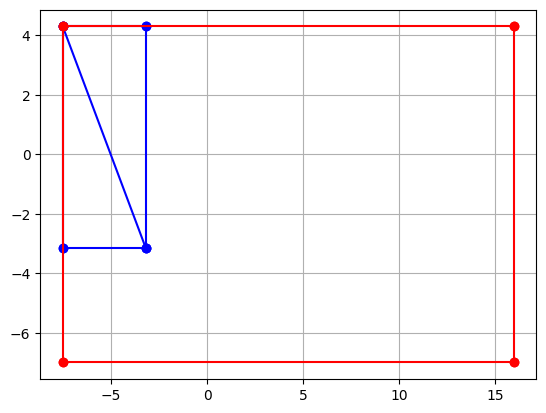

In [65]:
# F НЕВЕРНОЕ РЕШЕНИЕ
# vibo: WA на тесте-20
import matplotlib.pyplot as plt
plt.grid()

class Rectangle:

    def __init__(self, *args):
        # vibo: распаковываем переменные на входе
        # vibo: координаты точек - двух противоположных углов прямоугольника
        ((self.x1, self.y1), (self.x2, self.y2)) = args

        # vibo: получаем координаты всех углов начиная с левого верхнего по часовой стрелке
        if self.x1 < self.x2:
            if self.y1 > self.y2:
                self.l_up_x, self.l_up_y = self.x1, self.y1
                self.r_up_x, self.r_up_y = self.x2, self.y1
                self.r_dn_x, self.r_dn_y = self.x2, self.y2
                self.l_dn_x, self.l_dn_y = self.x1, self.y2
            else:
                self.l_up_x, self.l_up_y = self.x1, self.y2
                self.r_up_x, self.r_up_y = self.x2, self.y2
                self.r_dn_x, self.r_dn_y = self.x2, self.y1
                self.l_dn_x, self.l_dn_y = self.x1, self.y1

        else:
            if self.y1 > self.y2:
                self.l_up_x, self.l_up_y = self.x2, self.y1
                self.r_up_x, self.r_up_y = self.x1, self.y1
                self.r_dn_x, self.r_dn_y = self.x1, self.y2
                self.l_dn_x, self.l_dn_y = self.x2, self.y2

            else:
                self.l_up_x, self.l_up_y = self.x2, self.y2
                self.r_up_x, self.r_up_y = self.x1, self.y2
                self.r_dn_x, self.r_dn_y = self.x1, self.y1
                self.l_dn_x, self.l_dn_y = self.x2, self.y1

    # vibo: периметр прямоугольника
    def perimeter(self):
        if self.r_up_x != self.l_up_x and self.l_up_y != self.l_dn_y:
            return round((self.r_up_x - self.l_up_x) * 2 + (self.l_up_y - self.l_dn_y) * 2, 2)
        else:
            return 0

    # vibo: площадь прямоугольника
    def area(self):
        return round((self.r_up_x - self.l_up_x) * (self.l_up_y - self.l_dn_y), 2)

    # vibo: возвращает координаты верхнего левого угла в виде кортежа
    def get_pos(self):
        return f'({self.l_up_x}, {self.l_up_y})'

    # vibo: возвращает размеры в виде кортежа
    def get_size(self):
        return round((self.r_up_x - self.l_up_x), 2), round((self.l_up_y - self.l_dn_y), 2)

    # vibo: изменяет положение на заданные значения
    def move(self, dx, dy):


        # vibo: визуализация перед методом
        plt.plot([rect.x1, rect.x2], [rect.y1, rect.y2], marker = 'o', color='blue')
        plt.plot([rect.l_up_x, rect.r_up_x], [rect.l_up_y, rect.r_up_y], marker = 'o', color='blue')
        plt.plot([rect.l_dn_x, rect.r_dn_x], [rect.l_dn_y, rect.r_dn_y], marker = 'o', color='blue')
        plt.plot([rect.r_up_x, rect.r_dn_x], [rect.r_up_y, rect.r_dn_y], marker = 'o', color='blue')
        plt.plot([rect.l_up_x, rect.l_dn_x], [rect.l_up_y, rect.l_dn_y], marker = 'o', color='blue')


        self.l_up_x, self.l_up_y = round(self.l_up_x + dx, 2), round(self.l_up_y + dy, 2)
        self.r_up_x, self.r_up_y = round(self.r_up_x + dx, 2), round(self.r_up_y + dy, 2)
        self.r_dn_x, self.r_dn_y = round(self.r_dn_x + dx, 2), round(self.r_dn_y + dy, 2)
        self.l_dn_x, self.l_dn_y = round(self.l_dn_x + dx, 2), round(self.l_dn_y + dy, 2)


        # vibo: визуализация после метода
        # plt.plot([rect.x1, rect.x2], [rect.y1, rect.y2], marker = 'o', color = 'blue')
        plt.plot([rect.l_up_x, rect.r_up_x], [rect.l_up_y, rect.r_up_y], marker = 'o', color='red')
        plt.plot([rect.l_dn_x, rect.r_dn_x], [rect.l_dn_y, rect.r_dn_y], marker = 'o', color='red')
        plt.plot([rect.r_up_x, rect.r_dn_x], [rect.r_up_y, rect.r_dn_y], marker = 'o', color='red')
        plt.plot([rect.l_up_x, rect.l_dn_x], [rect.l_up_y, rect.l_dn_y], marker = 'o', color='red')


    # vibo: изменяет размер (положение верхнего левого угла остаётся неизменным)
    def resize(self, width, height):


        # vibo: визуализация перед методом
        plt.plot([rect.x1, rect.x2], [rect.y1, rect.y2], marker = 'o', color='blue')
        plt.plot([rect.l_up_x, rect.r_up_x], [rect.l_up_y, rect.r_up_y], marker = 'o', color='blue')
        plt.plot([rect.l_dn_x, rect.r_dn_x], [rect.l_dn_y, rect.r_dn_y], marker = 'o', color='blue')
        plt.plot([rect.r_up_x, rect.r_dn_x], [rect.r_up_y, rect.r_dn_y], marker = 'o', color='blue')
        plt.plot([rect.l_up_x, rect.l_dn_x], [rect.l_up_y, rect.l_dn_y], marker = 'o', color='blue')


        self.l_up_x, self.l_up_y = self.l_up_x, self.l_up_y
        self.r_up_x, self.r_up_y = round(self.l_up_x + width, 2), round(self.l_up_y, 2)
        self.r_dn_x, self.r_dn_y = round(self.l_up_x + width, 2), round(self.l_up_y - height, 2)
        self.l_dn_x, self.l_dn_y = round(self.l_up_x, 2), round(self.l_up_y - height, 2)

        if width < 0 or height < 0:

            self.x1, self.y1, self.x2, self.y2 = self.l_up_x, self.l_up_y, self.r_dn_x, self.r_dn_y

            if self.x1 < self.x2:
                if self.y1 > self.y2:
                    self.l_up_x, self.l_up_y = self.x1, self.y1
                    self.r_up_x, self.r_up_y = self.x2, self.y1
                    self.r_dn_x, self.r_dn_y = self.x2, self.y2
                    self.l_dn_x, self.l_dn_y = self.x1, self.y2
                else:
                    self.l_up_x, self.l_up_y = self.x1, self.y2
                    self.r_up_x, self.r_up_y = self.x2, self.y2
                    self.r_dn_x, self.r_dn_y = self.x2, self.y1
                    self.l_dn_x, self.l_dn_y = self.x1, self.y1

            else:
                if self.y1 > self.y2:
                    self.l_up_x, self.l_up_y = self.x2, self.y1
                    self.r_up_x, self.r_up_y = self.x1, self.y1
                    self.r_dn_x, self.r_dn_y = self.x1, self.y2
                    self.l_dn_x, self.l_dn_y = self.x2, self.y2

                else:
                    self.l_up_x, self.l_up_y = self.x2, self.y2
                    self.r_up_x, self.r_up_y = self.x1, self.y2
                    self.r_dn_x, self.r_dn_y = self.x1, self.y1
                    self.l_dn_x, self.l_dn_y = self.x2, self.y1


        # vibo: визуализация после метода
        # plt.plot([rect.x1, rect.x2], [rect.y1, rect.y2], marker = 'o', color = 'blue')
        plt.plot([rect.l_up_x, rect.r_up_x], [rect.l_up_y, rect.r_up_y], marker = 'o', color='red')
        plt.plot([rect.l_dn_x, rect.r_dn_x], [rect.l_dn_y, rect.r_dn_y], marker = 'o', color='red')
        plt.plot([rect.r_up_x, rect.r_dn_x], [rect.r_up_y, rect.r_dn_y], marker = 'o', color='red')
        plt.plot([rect.l_up_x, rect.l_dn_x], [rect.l_up_y, rect.l_dn_y], marker = 'o', color='red')


# # vibo: Пример 1.
# rect = Rectangle((3.2, -4.3), (7.52, 3.14))
# print(rect.get_pos(), rect.get_size())
# rect.move(3, -3)
# print(rect.get_pos(), rect.get_size())

# vibo: Пример 2.
rect = Rectangle((-7.52, 4.3), (-3.2, -3.14))
print(rect.get_pos(), rect.get_size())
rect.resize(23.5, 11.3)
print(rect.get_pos(), rect.get_size())

(-5, -2) (15, 2)
(-1.25, -2.5) (7.5, 1.0)


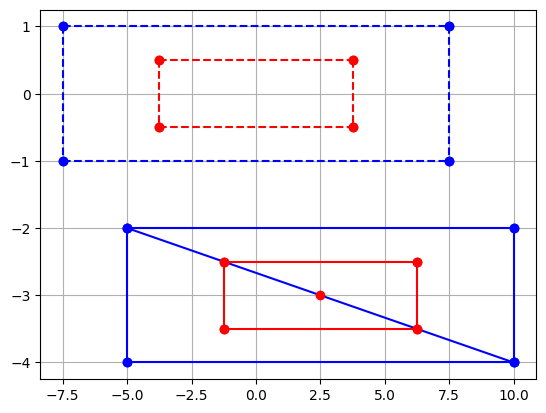

In [16]:
# G НЕВЕРНОЕ РЕШЕШНИЕ
# vibo: WA на тесте-3
import matplotlib.pyplot as plt
plt.grid()

class Rectangle:

    def __init__(self, *args):
        # vibo: распаковываем переменные на входе
        # vibo: координаты точек - двух противоположных углов прямоугольника
        ((self.x1, self.y1), (self.x2, self.y2)) = args

        # vibo: получаем координаты всех углов начиная с левого верхнего по часовой стрелке
        if self.x1 < self.x2:
            if self.y1 > self.y2:
                self.l_up_x, self.l_up_y = self.x1, self.y1
                self.r_up_x, self.r_up_y = self.x2, self.y1
                self.r_dn_x, self.r_dn_y = self.x2, self.y2
                self.l_dn_x, self.l_dn_y = self.x1, self.y2
            else:
                self.l_up_x, self.l_up_y = self.x1, self.y2
                self.r_up_x, self.r_up_y = self.x2, self.y2
                self.r_dn_x, self.r_dn_y = self.x2, self.y1
                self.l_dn_x, self.l_dn_y = self.x1, self.y1

        else:
            if self.y1 > self.y2:
                self.l_up_x, self.l_up_y = self.x2, self.y1
                self.r_up_x, self.r_up_y = self.x1, self.y1
                self.r_dn_x, self.r_dn_y = self.x1, self.y2
                self.l_dn_x, self.l_dn_y = self.x2, self.y2

            else:
                self.l_up_x, self.l_up_y = self.x2, self.y2
                self.r_up_x, self.r_up_y = self.x1, self.y2
                self.r_dn_x, self.r_dn_y = self.x1, self.y1
                self.l_dn_x, self.l_dn_y = self.x2, self.y1

    # vibo: рассчитываем периметр прямоугольника
    def perimeter(self):
        return round(abs(self.l_up_x - self.r_up_x) * 2 + abs(self.l_up_y - self.l_dn_y) * 2, 2)

    # vibo: рассчитываем площадь прямоугольника
    def area(self):
        return round(abs(self.l_up_x - self.r_up_x) * abs(self.l_up_y - self.l_dn_y), 2)

    # vibo: возвращает координаты верхнего левого угла в виде кортежа
    def get_pos(self):
        return f'({self.l_up_x}, {self.l_up_y})'

    # vibo: возвращает размеры в виде кортежа
    def get_size(self):
        return round(abs(self.l_up_x - self.r_up_x), 2), round(abs(self.l_up_y - self.l_dn_y), 2)

    # vibo: изменяет положение на заданные значения
    def move(self, dx, dy):
        self.l_up_x, self.l_up_y = round(self.l_up_x + dx, 2), round(self.l_up_y + dy, 2)
        self.r_up_x, self.r_up_y = round(self.r_up_x + dx, 2), round(self.r_up_y + dy, 2)
        self.r_dn_x, self.r_dn_y = round(self.r_dn_x + dx, 2), round(self.r_dn_y + dy, 2)
        self.l_dn_x, self.l_dn_y = round(self.l_dn_x + dx, 2), round(self.l_dn_y + dy, 2)

    # vibo: изменяет размер (положение верхнего левого угла остаётся неизменным)
    def resize(self, width, height):
        # x0 = self.l_up_x
        # y0 = self.l_up_y
        #
        # self.l_up_x, self.l_up_y = round(x0, 2), round(y0, 2)
        # self.r_up_x, self.r_up_y = round(x0 + width, 2), round(y0, 2)
        # self.r_dn_x, self.r_dn_y = round(x0 + width, 2), round(y0 - height, 2)
        # self.l_dn_x, self.l_dn_y = round(x0, 2), round(y0 - height, 2)

        self.l_up_x, self.l_up_y = round(self.l_up_x, 2), round(self.l_up_y, 2)
        self.r_up_x, self.r_up_y = round(self.l_up_x + width, 2), round(self.l_up_y, 2)
        self.r_dn_x, self.r_dn_y = round(self.l_up_x + width, 2), round(self.l_up_y - height, 2)
        self.l_dn_x, self.l_dn_y = round(self.l_up_x, 2), round(self.l_up_y - height, 2)

    # vibo: поворачивает прямоугольник на 90 градусов; по часовой стрелке вокруг его центра
    def turn(self):


        # vibo: визуализация перед методом
        plt.plot([rect.x1, rect.x2], [rect.y1, rect.y2], marker = 'o', color='blue')
        plt.plot([rect.l_up_x, rect.r_up_x], [rect.l_up_y, rect.r_up_y], marker = 'o', color='blue')
        plt.plot([rect.l_dn_x, rect.r_dn_x], [rect.l_dn_y, rect.r_dn_y], marker = 'o', color='blue')
        plt.plot([rect.r_up_x, rect.r_dn_x], [rect.r_up_y, rect.r_dn_y], marker = 'o', color='blue')
        plt.plot([rect.l_up_x, rect.l_dn_x], [rect.l_up_y, rect.l_dn_y], marker = 'o', color='blue')


        # vibo: находим центр
        center_x = round(((self.r_up_x - self.l_up_x) / 2) + self.l_up_x, 2)
        center_y = round(self.l_up_y - ((self.l_up_y - self.l_dn_y) / 2), 2)


        # vibo: отображаем цетр
        plt.plot([center_x], [center_y], marker = 'o', color='red')


        # vibo: перемещаемся в центр координат
        self.move(-center_x, -center_y)


        plt.plot([rect.l_up_x, rect.r_up_x], [rect.l_up_y, rect.r_up_y], marker = 'o', color='blue', linestyle = '--')
        plt.plot([rect.l_dn_x, rect.r_dn_x], [rect.l_dn_y, rect.r_dn_y], marker = 'o', color='blue', linestyle = '--')
        plt.plot([rect.r_up_x, rect.r_dn_x], [rect.r_up_y, rect.r_dn_y], marker = 'o', color='blue', linestyle = '--')
        plt.plot([rect.l_up_x, rect.l_dn_x], [rect.l_up_y, rect.l_dn_y], marker = 'o', color='blue', linestyle = '--')


        # vibo: поворот на 90 градусов по часовой стрелке
        self.l_up_x, self.l_up_y = -self.l_up_y, -self.l_up_x
        self.r_up_x, self.r_up_y = self.r_up_y, self.r_up_x
        self.r_dn_x, self.r_dn_y = -self.r_dn_y, -self.r_dn_x
        self.l_dn_x, self.l_dn_y = self.l_dn_y, self.l_dn_x


        plt.plot([rect.l_up_x, rect.r_up_x], [rect.l_up_y, rect.r_up_y], marker = 'o', color='red', linestyle = '--')
        plt.plot([rect.l_dn_x, rect.r_dn_x], [rect.l_dn_y, rect.r_dn_y], marker = 'o', color='red', linestyle = '--')
        plt.plot([rect.r_up_x, rect.r_dn_x], [rect.r_up_y, rect.r_dn_y], marker = 'o', color='red', linestyle = '--')
        plt.plot([rect.l_up_x, rect.l_dn_x], [rect.l_up_y, rect.l_dn_y], marker = 'o', color='red', linestyle = '--')


        # vibo: возвращаемся в исходный центр
        self.move(center_x, center_y)


        # vibo: визуализация после метода
        # plt.plot([rect.x1, rect.x2], [rect.y1, rect.y2], marker = 'o', color = 'blue')
        plt.plot([rect.l_up_x, rect.r_up_x], [rect.l_up_y, rect.r_up_y], marker = 'o', color='red')
        plt.plot([rect.l_dn_x, rect.r_dn_x], [rect.l_dn_y, rect.r_dn_y], marker = 'o', color='red')
        plt.plot([rect.r_up_x, rect.r_dn_x], [rect.r_up_y, rect.r_dn_y], marker = 'o', color='red')
        plt.plot([rect.l_up_x, rect.l_dn_x], [rect.l_up_y, rect.l_dn_y], marker = 'o', color='red')


    # vibo: изменяет размер в указанное количество раз, тоже относительно центра
    def scale(self, factor):


        # vibo: визуализация перед методом
        plt.plot([rect.x1, rect.x2], [rect.y1, rect.y2], marker = 'o', color='blue')
        plt.plot([rect.l_up_x, rect.r_up_x], [rect.l_up_y, rect.r_up_y], marker = 'o', color='blue')
        plt.plot([rect.l_dn_x, rect.r_dn_x], [rect.l_dn_y, rect.r_dn_y], marker = 'o', color='blue')
        plt.plot([rect.r_up_x, rect.r_dn_x], [rect.r_up_y, rect.r_dn_y], marker = 'o', color='blue')
        plt.plot([rect.l_up_x, rect.l_dn_x], [rect.l_up_y, rect.l_dn_y], marker = 'o', color='blue')


        # vibo: находим центр
        center_x = round(((self.r_up_x - self.l_up_x) / 2) + self.l_up_x, 2)
        center_y = round(self.l_up_y - ((self.l_up_y - self.l_dn_y) / 2), 2)


        # vibo: отображаем цетр
        plt.plot([center_x], [center_y], marker = 'o', color='red')


        # vibo: перемещаемся в центр координат
        self.move(-center_x, -center_y)


        plt.plot([rect.l_up_x, rect.r_up_x], [rect.l_up_y, rect.r_up_y], marker = 'o', color='blue', linestyle = '--')
        plt.plot([rect.l_dn_x, rect.r_dn_x], [rect.l_dn_y, rect.r_dn_y], marker = 'o', color='blue', linestyle = '--')
        plt.plot([rect.r_up_x, rect.r_dn_x], [rect.r_up_y, rect.r_dn_y], marker = 'o', color='blue', linestyle = '--')
        plt.plot([rect.l_up_x, rect.l_dn_x], [rect.l_up_y, rect.l_dn_y], marker = 'o', color='blue', linestyle = '--')


        # vibo: масштабирование
        self.l_up_x, self.l_up_y = round(self.l_up_x * factor, 2), round(self.l_up_y * factor, 2)
        self.r_up_x, self.r_up_y = round(self.r_up_x * factor, 2), round(self.r_up_y * factor, 2)
        self.r_dn_x, self.r_dn_y = round(self.r_dn_x * factor, 2), round(self.r_dn_y * factor, 2)
        self.l_dn_x, self.l_dn_y = round(self.l_dn_x * factor, 2), round(self.l_dn_y * factor, 2)


        plt.plot([rect.l_up_x, rect.r_up_x], [rect.l_up_y, rect.r_up_y], marker = 'o', color='red', linestyle = '--')
        plt.plot([rect.l_dn_x, rect.r_dn_x], [rect.l_dn_y, rect.r_dn_y], marker = 'o', color='red', linestyle = '--')
        plt.plot([rect.r_up_x, rect.r_dn_x], [rect.r_up_y, rect.r_dn_y], marker = 'o', color='red', linestyle = '--')
        plt.plot([rect.l_up_x, rect.l_dn_x], [rect.l_up_y, rect.l_dn_y], marker = 'o', color='red', linestyle = '--')


        # vibo: возвращаемся в исходный центр
        self.move(center_x, center_y)


        # vibo: визуализация после метода
        # plt.plot([rect.x1, rect.x2], [rect.y1, rect.y2], marker = 'o', color = 'blue')
        plt.plot([rect.l_up_x, rect.r_up_x], [rect.l_up_y, rect.r_up_y], marker = 'o', color='red')
        plt.plot([rect.l_dn_x, rect.r_dn_x], [rect.l_dn_y, rect.r_dn_y], marker = 'o', color='red')
        plt.plot([rect.r_up_x, rect.r_dn_x], [rect.r_up_y, rect.r_dn_y], marker = 'o', color='red')
        plt.plot([rect.l_up_x, rect.l_dn_x], [rect.l_up_y, rect.l_dn_y], marker = 'o', color='red')


# # vibo: Пример 1
# rect = Rectangle((3.14, 2.71), (-3.14, -2.71))
# print(rect.get_pos(), rect.get_size(), sep='\n')
# rect.turn()
# print(rect.get_pos(), rect.get_size(), sep='\n')

# # vibo: Пример 2
# rect = Rectangle((3.14, 2.71), (-3.14, -2.71))
# print(rect.get_pos(), rect.get_size(), sep='\n')
# rect.scale(2.0)
# print(rect.get_pos(), rect.get_size(), sep='\n')

rect = Rectangle((-5, -2), (10, -4))
print(rect.get_pos(), rect.get_size())
rect.scale(0.5)
print(rect.get_pos(), rect.get_size())

In [ ]:
# H

In [ ]:
# I

In [ ]:
# J